In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
data = pd.read_csv('adult.csv')
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                       'relationship', 'race', 'sex', 'nativeCountry']
data = pd.get_dummies(data, columns=categorical_columns)
data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)
X = data.drop('income', axis=1)
y = data['income']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=3)  # You can adjust 'n_neighbors' as needed
knn_model.fit(X_train, y_train)

# Make predictions
knn_pred = knn_model.predict(X_test)

# Evaluate the KNN model using Mean Squared Error
knn_mse = mean_squared_error(y_test, knn_pred)
print(f"Mean Squared Error (KNN): {knn_mse}")


Mean Squared Error (KNN): 0.14312849034929087


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
data = pd.read_csv('data.csv')
X = data.drop('cv', axis=1)
y = data['cv']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Regressor
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

# Calculate MSE
mse_tree = mean_squared_error(y_test, y_pred)
print(f'Decision Tree MSE: {mse_tree:.2f}')

# Baseline Model: Mean Predictor
y_baseline_pred = np.full(shape=y_test.shape, fill_value=y_train.mean())
mse_baseline = mean_squared_error(y_test, y_baseline_pred)
print(f'Baseline MSE: {mse_baseline:.2f}')

# Interpretation
if mse_tree < mse_baseline:
    print("The Decision Tree model performs better than the baseline.")
else:
    print("The Decision Tree model does not outperform the baseline.")

Decision Tree MSE: 11.54
Baseline MSE: 36.52
The Decision Tree model performs better than the baseline.


In [ ]:
Feed forward neural networks are artificial neural networks in
which nodes do not form loops. This type of neural network is also known
as a multi-layer neural network as all information is
only passed forward.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv('data.csv')

# Separate features and target variable
X = data.drop('cv', axis=1)
y = data['cv']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Feedforward Neural Network
model = Sequential()

# Input layer + Hidden layer 1
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))

# Hidden layer 2
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
# Output layer (no activation for regression)
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Mean Squared Error on test set: {mse:.2f}')

Epoch 1/100


C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 91.1011 - mean_squared_error: 91.1011 - val_loss: 33.7534 - val_mean_squared_error: 33.7534
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 90.2831 - mean_squared_error: 90.2831 - val_loss: 33.1942 - val_mean_squared_error: 33.1942
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 89.4732 - mean_squared_error: 89.4732 - val_loss: 32.6372 - val_mean_squared_error: 32.6372
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 88.6574 - mean_squared_error: 88.6574 - val_loss: 32.0934 - val_mean_squared_error: 32.0934
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 87.8500 - mean_squared_error: 87.8500 - val_loss: 31.5719 - val_mean_squared_error: 31.5719
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 87.0345 - mean_squared_error: 87.0345 - val_loss: 31.0605 - val_mean_squared_error: 31.0605
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 86.2250 - mean_squared_error: 86.2250 - val_loss: 30.549

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv('data.csv')

# Separate features and target variable
X = data.drop('cv', axis=1)
y = data['cv']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Multilayer Perceptron model
input_neurons = X_train.shape[1]
print(f"Input layer neurons: {input_neurons}")

model = Sequential()

# Input layer + Hidden layer 1
layer1_neurons = 64
model.add(Dense(layer1_neurons, input_shape=(input_neurons,), activation='relu'))
print(f"Hidden layer 1 neurons: {layer1_neurons} ({(layer1_neurons / input_neurons) * 100:.2f}% of input neurons)")

# Hidden layer 2
layer2_neurons = 32
model.add(Dense(layer2_neurons, activation='relu'))
print(f"Hidden layer 2 neurons: {layer2_neurons} ({(layer2_neurons / input_neurons) * 100:.2f}% of input neurons)")

# Hidden layer 3
layer3_neurons = 16
model.add(Dense(layer3_neurons, activation='relu'))
print(f"Hidden layer 3 neurons: {layer3_neurons} ({(layer3_neurons / input_neurons) * 100:.2f}% of input neurons)")

# Output layer (no activation for regression)
output_neurons = 1
model.add(Dense(output_neurons))
print(f"Output layer neurons: {output_neurons}")

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Mean Squared Error on test set: {mse:.2f}')


Input layer neurons: 8
Hidden layer 1 neurons: 64 (800.00% of input neurons)
Hidden layer 2 neurons: 32 (400.00% of input neurons)
Hidden layer 3 neurons: 16 (200.00% of input neurons)
Output layer neurons: 1
Epoch 1/100


C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 92.2266 - mean_squared_error: 92.2266 - val_loss: 38.9801 - val_mean_squared_error: 38.9801
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 91.4226 - mean_squared_error: 91.4226 - val_loss: 38.4453 - val_mean_squared_error: 38.4453
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 90.7767 - mean_squared_error: 90.7767 - val_loss: 37.9123 - val_mean_squared_error: 37.9123
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 90.2218 - mean_squared_error: 90.2218 - val_loss: 37.4435 - val_mean_squared_error: 37.4435
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 89.7177 - mean_squared_error: 89.7177 - val_loss: 37.0045 - val_mean_squared_error: 37.0045
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 89.2947 - mean_squared_error: 89.2947 - val_loss: 36.6036 - val_mean_squared_error: 36.6036
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 88.8402 - mean_squared_error: 88.8402 - val_loss: 36.210

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load and preprocess data
data = pd.read_csv('data.csv')
X = data.drop('cv', axis=1)  # Features
y = data['cv']               # Target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Deep Neural Network
model = Sequential()

# Add multiple hidden layers to make it deep
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer for regression (1 neuron, no activation)
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Mean Squared Error on test set: {mse:.2f}')

Epoch 1/100


C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 89.0842 - mean_squared_error: 89.0842 - val_loss: 33.1002 - val_mean_squared_error: 33.1002
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 87.1261 - mean_squared_error: 87.1261 - val_loss: 31.8167 - val_mean_squared_error: 31.8167
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 85.0967 - mean_squared_error: 85.0967 - val_loss: 30.5230 - val_mean_squared_error: 30.5230
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 83.0975 - mean_squared_error: 83.0975 - val_loss: 29.0009 - val_mean_squared_error: 29.0009
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 81.0539 - mean_squared_error: 81.0539 - val_loss: 27.3823 - val_mean_squared_error: 27.3823
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 78.9724 - mean_squared_error: 78.9724 - val_loss: 25.6817 - val_mean_squared_error: 25.6817
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 76.7615 - mean_squared_error: 76.7615 - val_loss: 23.959

In [5]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load dataset
data = pd.read_csv('data.csv')
X = data.drop('cv', axis=1)  # Features
y = data['cv']               # Target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a gradient boosting model
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=3)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 10.45


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Example ANN Model
model = Sequential([
    Dense(16, input_dim=8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# After training the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Extract weights and biases
for layer in model.layers:
    weights, biases = layer.get_weights()
    print(f"Weights:\n{weights}\nBiases:\n{biases}")


Weights:
[[-0.14228773  0.23097992  0.18103433 -0.1794548  -0.2291621   0.17873633
  -0.0134089   0.00837946  0.26026273 -0.31612873  0.40984845 -0.13697457
  -0.00084341 -0.12880862 -0.21547854 -0.37155998]
 [-0.2273618  -0.44749045 -0.16939104 -0.15489662  0.49923956  0.2774104
   0.15419292  0.2422961  -0.15746343  0.41638255  0.16779017 -0.32647264
   0.06560421 -0.28800893 -0.41184103 -0.44949746]
 [-0.37288237 -0.32915163  0.01651227 -0.06445384 -0.30833793  0.15362978
   0.47124386 -0.11557508 -0.05737221  0.2217288   0.34901965 -0.16314995
  -0.00805211  0.30972135  0.2597803  -0.37829113]
 [ 0.42146242 -0.13924325  0.32248342 -0.30105853 -0.45820332  0.2677939
  -0.27899337  0.28837264 -0.481686    0.06170845 -0.09427822 -0.05464876
   0.36891448 -0.36418557 -0.00064945 -0.48920667]
 [-0.12956476  0.20435119 -0.39946127  0.23367977 -0.31297803  0.04287601
   0.01046765  0.3525555   0.39286125 -0.18087852  0.4251238  -0.32807446
   0.28970897 -0.3680675  -0.48786616  0.49409306

C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2]:


import pandas as pd

# Load your small CSV
df = pd.read_csv("data.csv")

# Define how many times you want to repeat the data
repeats = 10  # Adjust the number of repetitions

# Repeat the dataset
df_expanded = pd.concat([df] * repeats, ignore_index=True)

# Save the new larger CSV
df_expanded.to_csv("large_data.csv", index=False)


In [3]:

import pandas as pd
import numpy as np
df = pd.read_csv("data.csv")
def perturb_data(df, noise_level=0.1):
    df_perturbed = df.copy()
    for column in df.select_dtypes(include=np.number).columns:
        noise = np.random.normal(0, noise_level, df[column].shape)
        df_perturbed[column] = df[column] + noise
    return df_perturbed
additional_rows = 1000 
expanded_df = df.copy()
for _ in range(additional_rows // len(df)): 
    perturbed_df = perturb_data(df)
    expanded_df = pd.concat([expanded_df, perturbed_df], ignore_index=True)
expanded_df.to_csv("large_data.csv", index=False)


RMSE: 6.02972719401873
R²: 0.8711413805992194


<Figure size 1000x800 with 0 Axes>

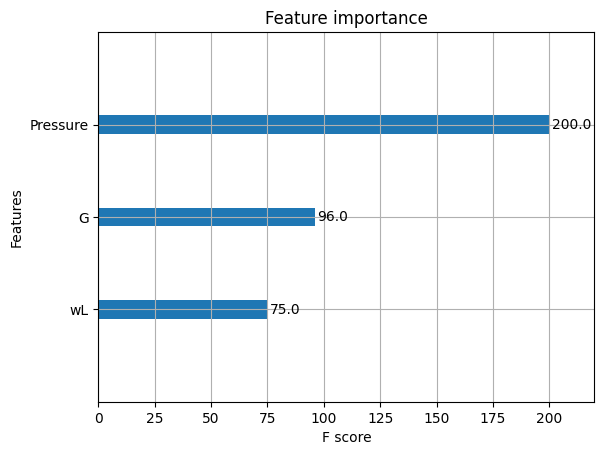

In [1]:
#xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('data.csv')

# Split features and target
X = data.drop("cv", axis=1)
y = data["cv"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Plot feature importance
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10, 8))
plot_importance(model, importance_type="weight")
plt.show()


In [2]:
Splitting Criteria:

XGBoost builds decision trees by selecting splits that maximize a gain metric 
(e.g., information gain, Gini index, etc.).
Features that contribute to significant improvements in splitting the data are
assigned higher importance.

SyntaxError: invalid syntax (2384925707.py, line 1)

In [1]:
#xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('data.csv')

# Split features and target
X = data.drop("cv", axis=1)
y = data["cv"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred)
print(rmse)


6.02972719401873


In [2]:
#cross validation
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(model,X,y,cv=5,scoring="neg_root_mean_squared_error")
print("cross validation",-cv_score.mean())

cross validation 3.350358100054996


In [3]:
#Feature importance sensitivity analysis
import numpy as np
for feature in X.columns:
    X_copy=X_test.copy()
    X_copy[feature]+=np.random.normal(0,0.1,size=X_copy[feature].shape)
    y_per=model.predict(X_copy)
    sen=np.mean(np.abs(y_per-y_pred))
    print(feature ," - ", sen)

G  -  0.0
wL  -  0.7513631
wp  -  0.0
IP  -  0.0
% Clay  -  0.0
% Silt  -  0.0
% Sand  -  0.0
Pressure  -  0.0


In [4]:
Feature importance sensitivity analysis is a technique that helps identify the most 
important features in a dataset

SyntaxError: invalid syntax (3716389146.py, line 1)

In [ ]:
#bagging regressor
from sklearn.ensemble import BaggingRegressor
bg_model=BaggingRegressor(estimator = XGBRegressor(),n_estimators=10,random_state=42)
bg_model.fit(X_train,y_train)
y_pred1=bg_model.predict(X_test)
bg_mse=mean_squared_error(y_test,y_pred1,squared=False)
print(bg_mse)

In [ ]:
boosting_model = XGBRegressor(
    n_estimators=200, 
    learning_rate=0.05, 
    max_depth=4, 
    subsample=0.8, 
    colsample_bytree=0.8, 
    random_state=42
)
boosting_model.fit(X_train, y_train)
y_boosting_pred = boosting_model.predict(X_test)
boosting_rmse = mean_squared_error(y_test, y_boosting_pred, squared=False)
print(f"Boosting RMSE: {boosting_rmse:.4f}")

# Step 10: Plot Feature Importance
plt.figure(figsize=(10, 8))
plot_importance(model, importance_type="weight")
plt.title("Feature Importance")
plt.show()


In [7]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network
model = Sequential([
    Dense(10, input_dim=X.shape[1], activation='relu'),
    Dense(1, activation='linear')
])

# Compile and train the model
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
def garson_feature_importance(model):
    """
    Calculates feature importance using the Garson algorithm.
    Parameters:
        model (keras.Sequential): A trained neural network model.
    Returns:
        numpy.ndarray: Feature importances.
    """
    weights = [layer.get_weights()[0] for layer in model.layers if len(layer.get_weights()) > 0]

    # Extract input-to-hidden and hidden-to-output weights
    input_hidden_weights = weights[0]
    hidden_output_weights = weights[1]
    
    # Compute absolute contributions
    abs_input_hidden = np.abs(input_hidden_weights)
    abs_hidden_output = np.abs(hidden_output_weights)
    
    # Contribution of each input feature
    total_contribution = np.sum(abs_input_hidden, axis=0) * np.sum(abs_hidden_output, axis=1)
 
    feature_importance = total_contribution / np.sum(total_contribution)
    
    return feature_importance

# Get feature importances
importances = garson_feature_importance(model)
print("Feature Importances (Garson):", importances)

Feature Importances (Garson): [0.1199988  0.11173499 0.11938599 0.00069652 0.1210194  0.1509683
 0.1310856  0.1050675  0.13924736 0.00079549]


In [11]:
def connection_weight_importance(model):
    weights=[layer.get_weights()[0] for layer in model.layers if len(layer.get_weights())>0 ]
    input_hidden_weights=weights[0]
    hidden_output_weights=weights[1]

    conection_weight=input_hidden_weights @ hidden_output_weights
    feature_importance=np.sum(np.abs(conection_weight),axis=1)
    feature_importance/= np.sum(feature_importance)
    return feature_importance

importance = connection_weight_importance(model)
print(importance)

[0.11101669 0.13238314 0.29257685 0.20841286 0.25561044]
